In [20]:
import sys
sys.path.append("/Users/buddy/Desktop/WGU-Reddit/WGU_catalog/helpers/")

In [21]:
from wgu_change_tracker import WGUHistoricalTracker
import json

In [30]:
# Load your raw snapshots
with open("/Users/buddy/Desktop/WGU-Reddit/WGU_catalog/helpers/college_snapshots.json") as f:
    colleges_reference = json.load(f)

with open("/Users/buddy/Desktop/WGU-Reddit/WGU_catalog/helpers/degree_snapshots_v10_seed.json") as f:
    degree_snapshots = json.load(f)

# Init tracker
tracker = WGUHistoricalTracker()

# Convert snapshots to minimal change logs
college_changes = tracker._convert_snapshots_to_changes(colleges_reference, "colleges")
degree_changes = tracker._convert_snapshots_to_changes(degree_snapshots, "degrees")

# Store them in the tracker object
tracker.college_changes = college_changes
tracker.degree_changes = degree_changes

# Save changes to disk
tracker.save_college_changes("/Users/buddy/Desktop/WGU-Reddit/WGU_catalog/helpers/college_changes.json")
tracker.save_degree_changes("/Users/buddy/Desktop/WGU-Reddit/WGU_catalog/helpers/degree_changes.json")

# Show timeline reports so you see what happened
tracker.college_timeline_report()
tracker.degree_timeline_report()


Date: 2017-01
  Added: College of Business, College of Health Professions, College of Information Technology, Teachers College

Date: 2023-01
  Added: Leavitt School of Health
  Removed: College of Health Professions

Date: 2023-03
  Added: School of Education
  Removed: Teachers College

Date: 2024-02
  Added: School of Business
  Removed: College of Business

Date: 2024-04
  Added: School of Technology
  Removed: College of Information Technology

Date: 2024-09
  Added: Certificates - Standard Paths

Date: 2017-01
  Added in College of Business: Bachelor of Science, Accounting, Bachelor of Science, Business - Healthcare Management, Bachelor of Science, Business - Human Resource Management, Bachelor of Science, Business - Information Technology Management, Bachelor of Science, Business Management, Bachelor of Science, Marketing Management, MBA, Healthcare Management, MBA, IT Management, Master of Business Administration, Master of Science, Accounting, Master of Science, Integrated He

In [23]:
# Example: See colleges at a date
print(tracker.get_colleges_at_date("2023-01"))

# Example: See degrees at a date
print(json.dumps(tracker.get_degrees_at_date("2017-01"), indent=2))

['College of Business', 'College of Information Technology', 'Leavitt School of Health', 'Teachers College']
{
  "College of Business": [
    "Bachelor of Science, Accounting",
    "Bachelor of Science, Business - Healthcare Management",
    "Bachelor of Science, Business - Human Resource Management",
    "Bachelor of Science, Business - Information Technology Management",
    "Bachelor of Science, Business Management",
    "Bachelor of Science, Marketing Management",
    "MBA, Healthcare Management",
    "MBA, IT Management",
    "Master of Business Administration",
    "Master of Science, Accounting",
    "Master of Science, Integrated Healthcare Management",
    "Master of Science, Management and Leadership"
  ],
  "College of Health Professions": [
    "Bachelor of Science, Nursing",
    "Master of Science, Nursing - Education",
    "Master of Science, Nursing - Leadership and Management",
    "Master of Science, Nursing - Nursing Informatics"
  ],
  "College of Information Technol

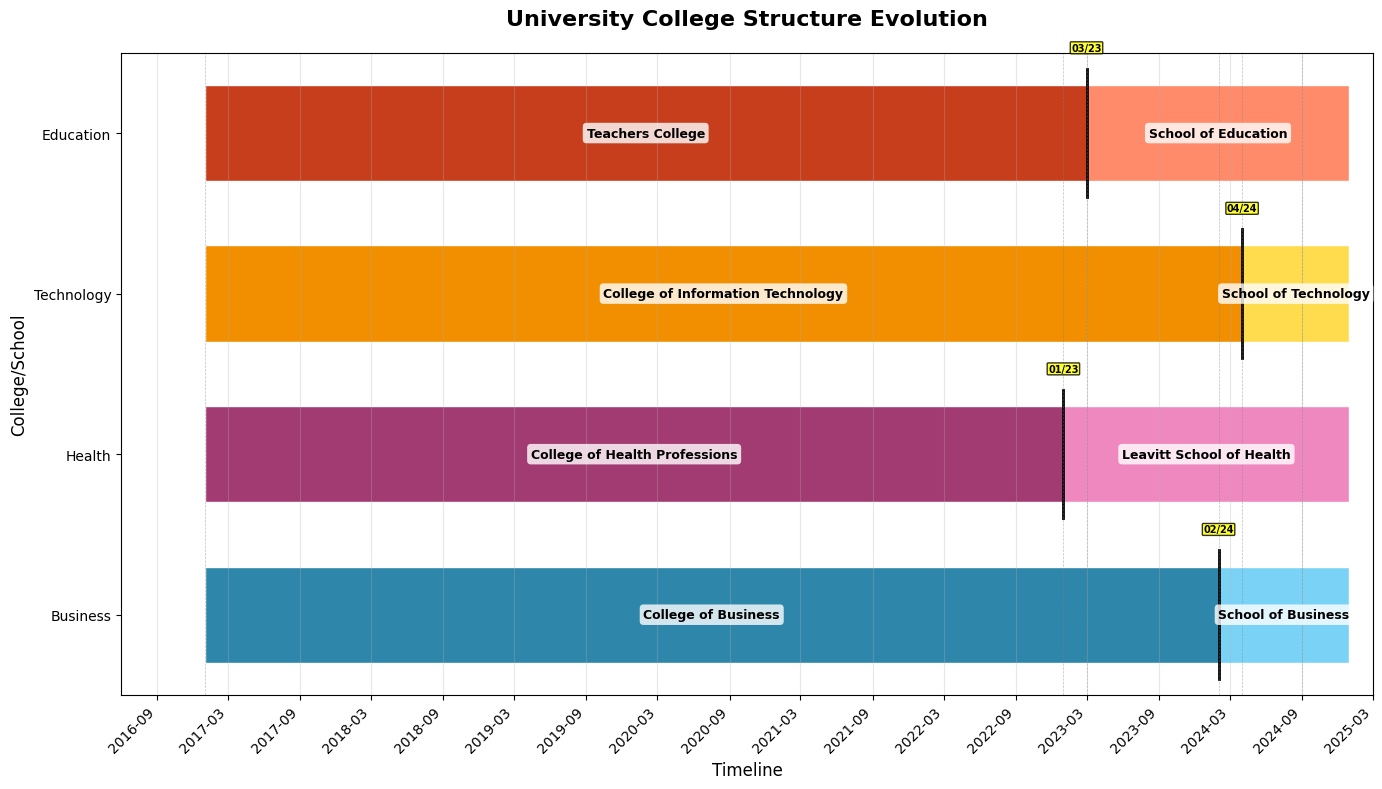

In [29]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import numpy as np

snapshots = {
    "2017-01": [
        "College of Business",
        "College of Health Professions",
        "College of Information Technology",
        "Teachers College"
    ],
    "2023-01": [
        "College of Business",
        "Leavitt School of Health",
        "College of Information Technology",
        "Teachers College"
    ],
    "2023-03": [
        "College of Business",
        "Leavitt School of Health",
        "College of Information Technology",
        "School of Education"
    ],
    "2024-02": [
        "School of Business",
        "Leavitt School of Health",
        "College of Information Technology",
        "School of Education"
    ],
    "2024-04": [
        "School of Business",
        "Leavitt School of Health",
        "School of Technology",
        "School of Education"
    ],
    "2024-09": [
        "School of Business",
        "Leavitt School of Health",
        "School of Technology",
        "School of Education"
    ]
}

# Convert dates to datetime objects for proper axis handling
date_objects = [datetime.strptime(date, "%Y-%m") for date in sorted(snapshots.keys())]
dates = sorted(snapshots.keys())

# Build tracks
tracks = {
    "Business": [],
    "Health": [],
    "Technology": [],
    "Education": []
}

for date in dates:
    current = snapshots[date]
    tracks["Business"].append(next((c for c in current if "Business" in c), None))
    tracks["Health"].append(next((c for c in current if "Health" in c), None))
    tracks["Technology"].append(next((c for c in current if "Technology" in c or "Information Technology" in c), None))
    tracks["Education"].append(next((c for c in current if "Education" in c or "Teachers College" in c), None))

# Create figure
fig, ax = plt.subplots(figsize=(14, 8))

# Define colors for each college track (base colors)
track_colors = {
    "Business": "#2E86AB",      # Blue
    "Health": "#A23B72",        # Purple
    "Technology": "#F18F01",    # Orange
    "Education": "#C73E1D"      # Red
}

# Y positions for each track
y_positions = {
    "Business": 0,
    "Health": 1,
    "Technology": 2,
    "Education": 3
}

bar_height = 0.6

# For each track, create segments with different shades for name changes
for track_name, college_names in tracks.items():
    y_pos = y_positions[track_name]
    base_color = track_colors[track_name]
    
    # Track segments where name changes occur
    segments = []
    current_name = college_names[0]
    start_idx = 0
    
    for i in range(1, len(college_names)):
        if college_names[i] != current_name:
            segments.append({
                'name': current_name,
                'start': start_idx,
                'end': i
            })
            current_name = college_names[i]
            start_idx = i
    
    # Add the final segment
    segments.append({
        'name': current_name,
        'start': start_idx,
        'end': len(college_names)
    })
    
    # Draw segments with different shades
    for seg_idx, segment in enumerate(segments):
        # Create different shades of the base color
        # First segment gets the base color, subsequent segments get lighter/darker versions
        if seg_idx == 0:
            color = base_color
        else:
            # Alternate between lighter and darker shades
            if seg_idx % 2 == 1:
                # Lighter shade
                color = plt.cm.colors.to_rgba(base_color)
                color = tuple(min(1.0, c + 0.3) if i < 3 else c for i, c in enumerate(color))
            else:
                # Darker shade
                color = plt.cm.colors.to_rgba(base_color)
                color = tuple(max(0.0, c - 0.3) if i < 3 else c for i, c in enumerate(color))
        
        # Calculate x positions
        start_x = date_objects[segment['start']]
        if segment['end'] < len(date_objects):
            end_x = date_objects[segment['end']]
        else:
            # Extend the last segment a bit for visibility
            end_x = datetime(2024, 12, 31)
        
        # Draw rectangle
        width = (end_x - start_x).days
        rect = plt.Rectangle((mdates.date2num(start_x), y_pos - bar_height/2), 
                           mdates.date2num(end_x) - mdates.date2num(start_x), 
                           bar_height, 
                           facecolor=color, 
                           edgecolor='white', 
                           linewidth=1)
        ax.add_patch(rect)
        
        # Add text label
        text_x = mdates.date2num(start_x) + (mdates.date2num(end_x) - mdates.date2num(start_x)) / 2
        ax.text(text_x, y_pos, segment['name'], 
               ha='center', va='center', 
               fontsize=9, fontweight='bold',
               bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8, edgecolor='none'))
        
        # Add tick marks at transition points (except for the first segment)
        if seg_idx > 0:
            tick_x = mdates.date2num(start_x)
            # Draw tick mark
            ax.plot([tick_x, tick_x], [y_pos - bar_height/2 - 0.1, y_pos + bar_height/2 + 0.1], 
                   'k-', linewidth=2)
            # Add date label above the tick
            ax.text(tick_x, y_pos + bar_height/2 + 0.2, 
                   start_x.strftime('%m/%y'), 
                   ha='center', va='bottom', 
                   fontsize=7, fontweight='bold',
                   bbox=dict(boxstyle="round,pad=0.1", facecolor='yellow', alpha=0.8, edgecolor='black'))

# Format the plot
ax.set_ylim(-0.5, 3.5)
ax.set_yticks([0, 1, 2, 3])
ax.set_yticklabels(["Business", "Health", "Technology", "Education"])

# Format x-axis
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')

# Set x-axis limits
ax.set_xlim(datetime(2016, 6, 1), datetime(2025, 3, 1))

# Add grid
ax.grid(True, alpha=0.3, axis='x')

# Labels and title
ax.set_title("University College Structure Evolution", fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel("Timeline", fontsize=12)
ax.set_ylabel("College/School", fontsize=12)

# Add vertical lines at transition points
for date_obj in date_objects:
    ax.axvline(x=date_obj, color='gray', linestyle='--', alpha=0.5, linewidth=0.5)

plt.tight_layout()
plt.show()